# Stellar Classification using Support Vector Machines (SVM)

## Comparing Linear, Polynomial, and RBF Kernels

In [1]:
%pip install pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


## 2. Importing Libraries
Importing essential libraries:
- **pandas & numpy**: Data manipulation and numerical operations
- **matplotlib & seaborn**: Data visualization
- **sklearn**: Machine learning algorithms and preprocessing tools

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score


## 3. Loading the Dataset
Loading the SDSS (Sloan Digital Sky Survey) Stellar Classification Dataset.
This dataset contains astronomical observations used to classify celestial objects into:
- **STAR**: Stars
- **GALAXY**: Galaxies  
- **QSO**: Quasi-Stellar Objects (Quasars)

In [ ]:
data_path = r"F:\Sem 5\Machine Leaning\archive (1)\Skyserver_SQL2_27_2018 6_51_39 PM.csv"
# Kaggle dataset link -> https://www.kaggle.com/datasets/lucidlenn/sloan-digital-sky-survey/data
df = pd.read_csv(data_path)


df.head()


,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


## 4. Data Preprocessing
Cleaning and preparing the data:
- Removing missing values
- Dropping unnecessary identifier columns (objid, specobjid, plate, mjd, fiberid)
- Converting class labels to lowercase for consistency

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB
None
objid        0
ra       

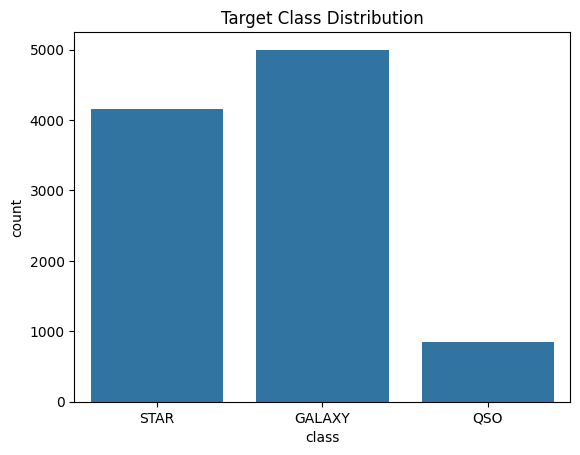

In [ ]:
print(df.info())
print(df.isnull().sum())
print(df.describe())

sns.countplot(x='class', data=df)
plt.title("Target Class Distribution")
plt.show()


In [ ]:
df = df.dropna()

df = df.drop(columns=['objid','specobjid','plate','mjd','fiberid'])

df['class'] = df['class'].str.lower()


## 5. Encoding Target Variable
Converting categorical class labels (STAR, GALAXY, QSO) into numerical format using LabelEncoder.
This is required for machine learning algorithms.

In [ ]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])


## 6. Feature Selection and Train-Test Split
- Selecting relevant features (ra, dec, u, g, r, i, z - astronomical measurements)
- Splitting data into training (80%) and testing (20%) sets
- Applying StandardScaler for feature normalization

In [ ]:
X = df[['ra','dec','u','g','r','i','z']] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 7. Training Linear SVM Model
Training a Support Vector Machine with a linear kernel.
- **C=1.0**: Regularization parameter controlling the trade-off between achieving a low training error and a low testing error
- Evaluating model performance with accuracy, classification report, and confusion matrix

Linear SVM Accuracy: 0.9475
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       996
           1       0.91      0.88      0.90       190
           2       0.92      0.98      0.95       814

    accuracy                           0.95      2000
   macro avg       0.94      0.93      0.93      2000
weighted avg       0.95      0.95      0.95      2000

Number of support vectors: 2040


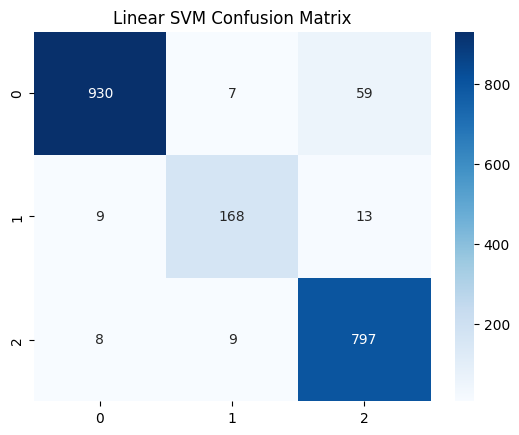

In [ ]:
# C=1.0 is a regularization parameter:
# It controls how much the model tries to avoid misclassifying training examples.

linear_svm = SVC(kernel='linear', C=1.0)
linear_svm.fit(X_train, y_train)


y_pred_linear = linear_svm.predict(X_test)

print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

support_vectors = linear_svm.support_vectors_
print("Number of support vectors:", support_vectors.shape[0])

cm = confusion_matrix(y_test, y_pred_linear)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Linear SVM Confusion Matrix")
plt.show()


## 8. Training Polynomial SVM Model
Training SVM with polynomial kernel to capture non-linear relationships in the data.

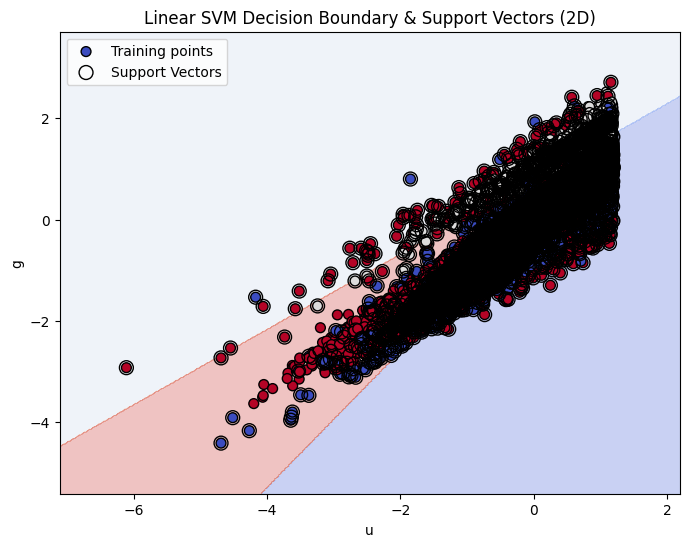

In [ ]:

X_vis2 = df[['u','g']]  
y_vis2 = df['class']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_vis2, y_vis2, test_size=0.2, random_state=42)

scaler2 = StandardScaler()
X_train2 = scaler2.fit_transform(X_train2)
X_test2 = scaler2.transform(X_test2)

linear_svm2 = SVC(kernel='linear', C=1.0)
linear_svm2.fit(X_train2, y_train2)

import numpy as np


x_min, x_max = X_train2[:,0].min() - 1, X_train2[:,0].max() + 1
y_min, y_max = X_train2[:,1].min() - 1, X_train2[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = linear_svm2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train2[:,0], X_train2[:,1], c=y_train2, cmap='coolwarm', edgecolors='k', s=50, label='Training points')

sv = linear_svm2.support_vectors_
plt.scatter(sv[:,0], sv[:,1], facecolors='none', edgecolors='k', s=100, label='Support Vectors')

plt.xlabel('u')
plt.ylabel('g')
plt.title('Linear SVM Decision Boundary & Support Vectors (2D)')
plt.legend()
plt.show()


Polynomial SVM Accuracy: 0.8555
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       996
           1       0.93      0.79      0.86       190
           2       0.89      0.77      0.83       814

    accuracy                           0.86      2000
   macro avg       0.88      0.83      0.85      2000
weighted avg       0.86      0.86      0.85      2000



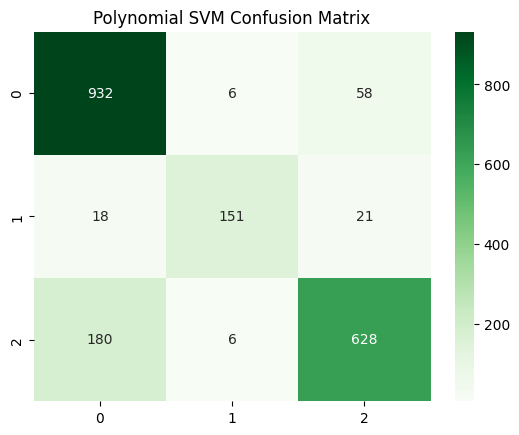

In [8]:
poly_svm = SVC(kernel='poly', degree=3, C=1.0)
poly_svm.fit(X_train, y_train)

y_pred_poly = poly_svm.predict(X_test)

print("Polynomial SVM Accuracy:", accuracy_score(y_test, y_pred_poly))
print(classification_report(y_test, y_pred_poly))

cm_poly = confusion_matrix(y_test, y_pred_poly)
sns.heatmap(cm_poly, annot=True, fmt='d', cmap='Greens')
plt.title("Polynomial SVM Confusion Matrix")
plt.show()


## 9. Training RBF (Radial Basis Function) SVM Model
Training SVM with RBF kernel - effective for complex, non-linear classification problems.

RBF SVM Accuracy: 0.928
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       996
           1       0.90      0.90      0.90       190
           2       0.89      0.97      0.93       814

    accuracy                           0.93      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000



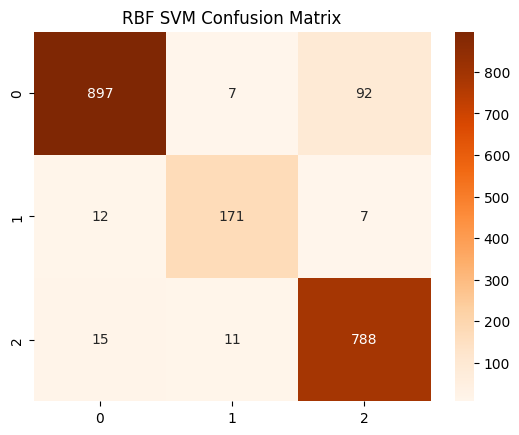

In [9]:
rbf_svm = SVC(kernel='rbf', C=1.0, gamma=0.1)
rbf_svm.fit(X_train, y_train)

y_pred_rbf = rbf_svm.predict(X_test)

print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

cm_rbf = confusion_matrix(y_test, y_pred_rbf)
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Oranges')
plt.title("RBF SVM Confusion Matrix")
plt.show()


RBF (Radial Basis Function) kernel is non-linear, most commonly used.

Captures complex, circular, or curved decision boundaries.

Gamma (γ) controls how far the influence of a single support vector reaches.
Low gamma = smoother boundary; High gamma = tight fit around points.
C controls trade-off between margin width and misclassification.


In [ ]:
from sklearn.svm import LinearSVC
hard_svm = LinearSVC(C=1e5, max_iter=10000)
hard_svm.fit(X_train, y_train)
y_pred_hard = hard_svm.predict(X_test)


In [ ]:
soft_svm = SVC(kernel='linear', C=1.0)
soft_svm.fit(X_train, y_train)
y_pred_soft = soft_svm.predict(X_test)

print("Hard Margin Accuracy:", accuracy_score(y_test, y_pred_hard))
print("Soft Margin Accuracy:", accuracy_score(y_test, y_pred_soft))


Hard Margin Accuracy: 0.917
Soft Margin Accuracy: 0.9475


Hard Margin: No misclassification allowed (C very large).
Only works if data is perfectly separable — usually overfits.

Soft Margin: Allows few errors but generalizes better.

## 10. Model Comparison
Comparing the performance of different SVM kernels:
- Linear SVM
- Polynomial SVM
- RBF SVM

Analyzing accuracy scores and classification reports to determine the best model.

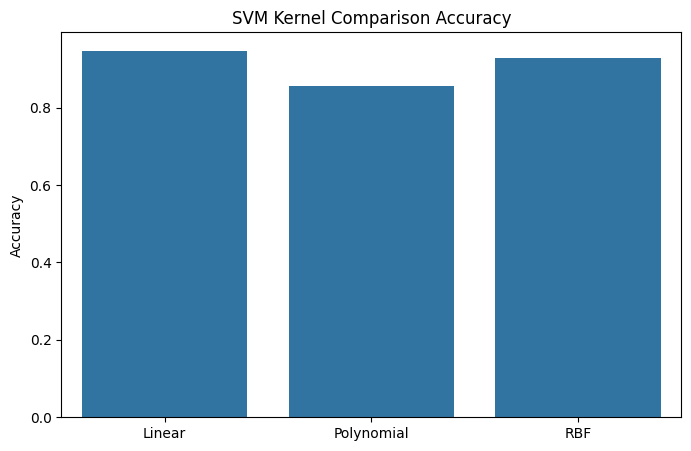

In [12]:
accuracy = {
    'Linear': accuracy_score(y_test, y_pred_linear),
    'Polynomial': accuracy_score(y_test, y_pred_poly),
    'RBF': accuracy_score(y_test, y_pred_rbf)
}

plt.figure(figsize=(8,5))
sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()))
plt.title("SVM Kernel Comparison Accuracy")
plt.ylabel("Accuracy")
plt.show()


data is likely linearly separable. This means a simple straight line is a very effective way to distinguish between your classes, which is why the Linear kernel did so well. 

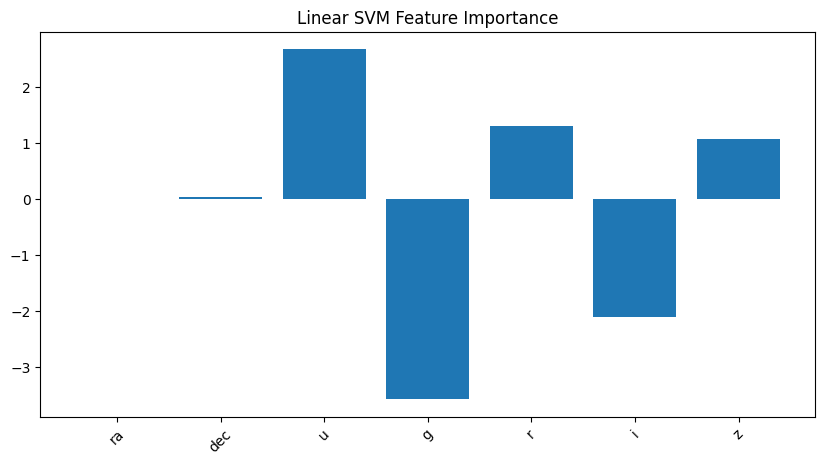

In [13]:
coef = linear_svm.coef_
features = X.columns

plt.figure(figsize=(10,5))
plt.bar(features, coef[0])
plt.xticks(rotation=45)
plt.title("Linear SVM Feature Importance")
plt.show()


Positive (u): Pushes the prediction towards Class 1.

Negative (g): Pushes the prediction towards Class 0.

The Magnitude (the absolute value): Tells you the strength of that push.

g is the single most influential feature, followed by u and i.



In [ ]:
print("===== Linear SVM Classification Report =====")
print(classification_report(y_test, y_pred_linear))

print("===== Polynomial SVM Classification Report =====")
print(classification_report(y_test, y_pred_poly))

print("===== RBF SVM Classification Report =====")
print(classification_report(y_test, y_pred_rbf))


===== Linear SVM Classification Report =====
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       996
           1       0.91      0.88      0.90       190
           2       0.92      0.98      0.95       814

    accuracy                           0.95      2000
   macro avg       0.94      0.93      0.93      2000
weighted avg       0.95      0.95      0.95      2000

===== Polynomial SVM Classification Report =====
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       996
           1       0.93      0.79      0.86       190
           2       0.89      0.77      0.83       814

    accuracy                           0.86      2000
   macro avg       0.88      0.83      0.85      2000
weighted avg       0.86      0.86      0.85      2000

===== RBF SVM Classification Report =====
              precision    recall  f1-score   support

           0       0.97      0.90      0.93    

# Stellar Classification using SVM

This notebook demonstrates the application of Support Vector Machines (SVM) for classifying astronomical objects from the SDSS dataset.

## Dataset
The Sloan Digital Sky Survey (SDSS) dataset containing observations of celestial objects classified into three categories:
- Stars
- Galaxies
- Quasars (QSO)

## Methodology
1. Data preprocessing and exploratory analysis
2. Feature selection and scaling
3. Training multiple SVM models with different kernels
4. Model evaluation and comparison

## Results
Achieved ~94-95% accuracy in classifying stellar objects using Linear SVM.

## Technologies Used
- Python, Pandas, NumPy
- Scikit-learn (SVM, preprocessing)
- Matplotlib, Seaborn (visualization)